In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !unzip archive.zip

In [3]:
df = pd.read_csv("Breast_Cancer.csv")

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
colors = [
    "#8187dc", # Light purple
    "#04052e", # Black
    "#97dffc", #Light Blue
]

In [7]:
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

In [8]:
def count_items(df, x, ax, main_color="grey", hue=None, palette=None):
    
    sns.countplot(data=df, x=x, ax=ax, 
                  color=main_color, saturation=0.7, linewidth=2,
                  hue=hue, palette=palette)
    
    
    # for container in ax.containers:
    #     ax.bar_label(container, 
    #                  color="black", fontsize=10, padding=4)
    
    ax.set_ylabel("")
    ax.set_xlabel(x, fontsize=15)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    
    
    set_style(ax)

In [9]:
def hist(df, x, ax, hue=None, palette=None, main_color=colors[0], second_color=colors[1]):
    
    alpha = 0.8
    if hue:
        alpha = 0.3
    
    sns.histplot(data=df, x=x, ax=ax,
                 hue=hue, palette=palette, 
                 color=main_color, linewidth=3, bins=20, alpha=alpha,
                 kde=True, line_kws={"linewidth":1, "linestyle":"--"}
                )
    ax.lines[0].set_color(second_color)
    
    ax.set_ylabel("Number of observation")
    ax.set_xlabel(x, fontsize="x-large")
    
    set_style(ax)

In [10]:
def strip(df, x, y, ax, palette=[colors[0], colors[2]], hue=None, alpha=1):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue, 
                  linewidth=0.5, size=4, ax=ax, alpha=alpha, edgecolor="black")
    
    ax.set_title(f"{x} vs {y}", pad=0)
    
    set_style(ax, bottom=True)

In [11]:
def cdf_plot(df, x, ax, hue=None, palette=None, main_color=colors[0]):
    
    sns.kdeplot(data=df, x=x, hue=hue, ax=ax, color=main_color,
                palette=palette,
                cumulative=True, warn_singular=False, linewidth=1, common_norm=False)
    
    set_style(ax)

In [12]:
def bar(df, x, y, ax, hue=None, palette=None, color=colors[0], order=None):
    
    sns.barplot(data=df, x=x, y=y, ax=ax, 
                hue=hue, palette=palette, color=color,
                linewidth=2, edgecolor="black", errwidth=2, capsize=0.07,
                order=order)
    
    ax.set_xlabel("")
    
    set_style(ax)

In [13]:
categorical_columns = []
numerical_column = []

for column in df.columns:
    # if dtype(df[column]) == "object":
    if df[column].dtype == "object":

        categorical_columns.append(column) 
    if df[column].dtype == "int":
        numerical_column.append(column)

print(categorical_columns)
print(numerical_column)

['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


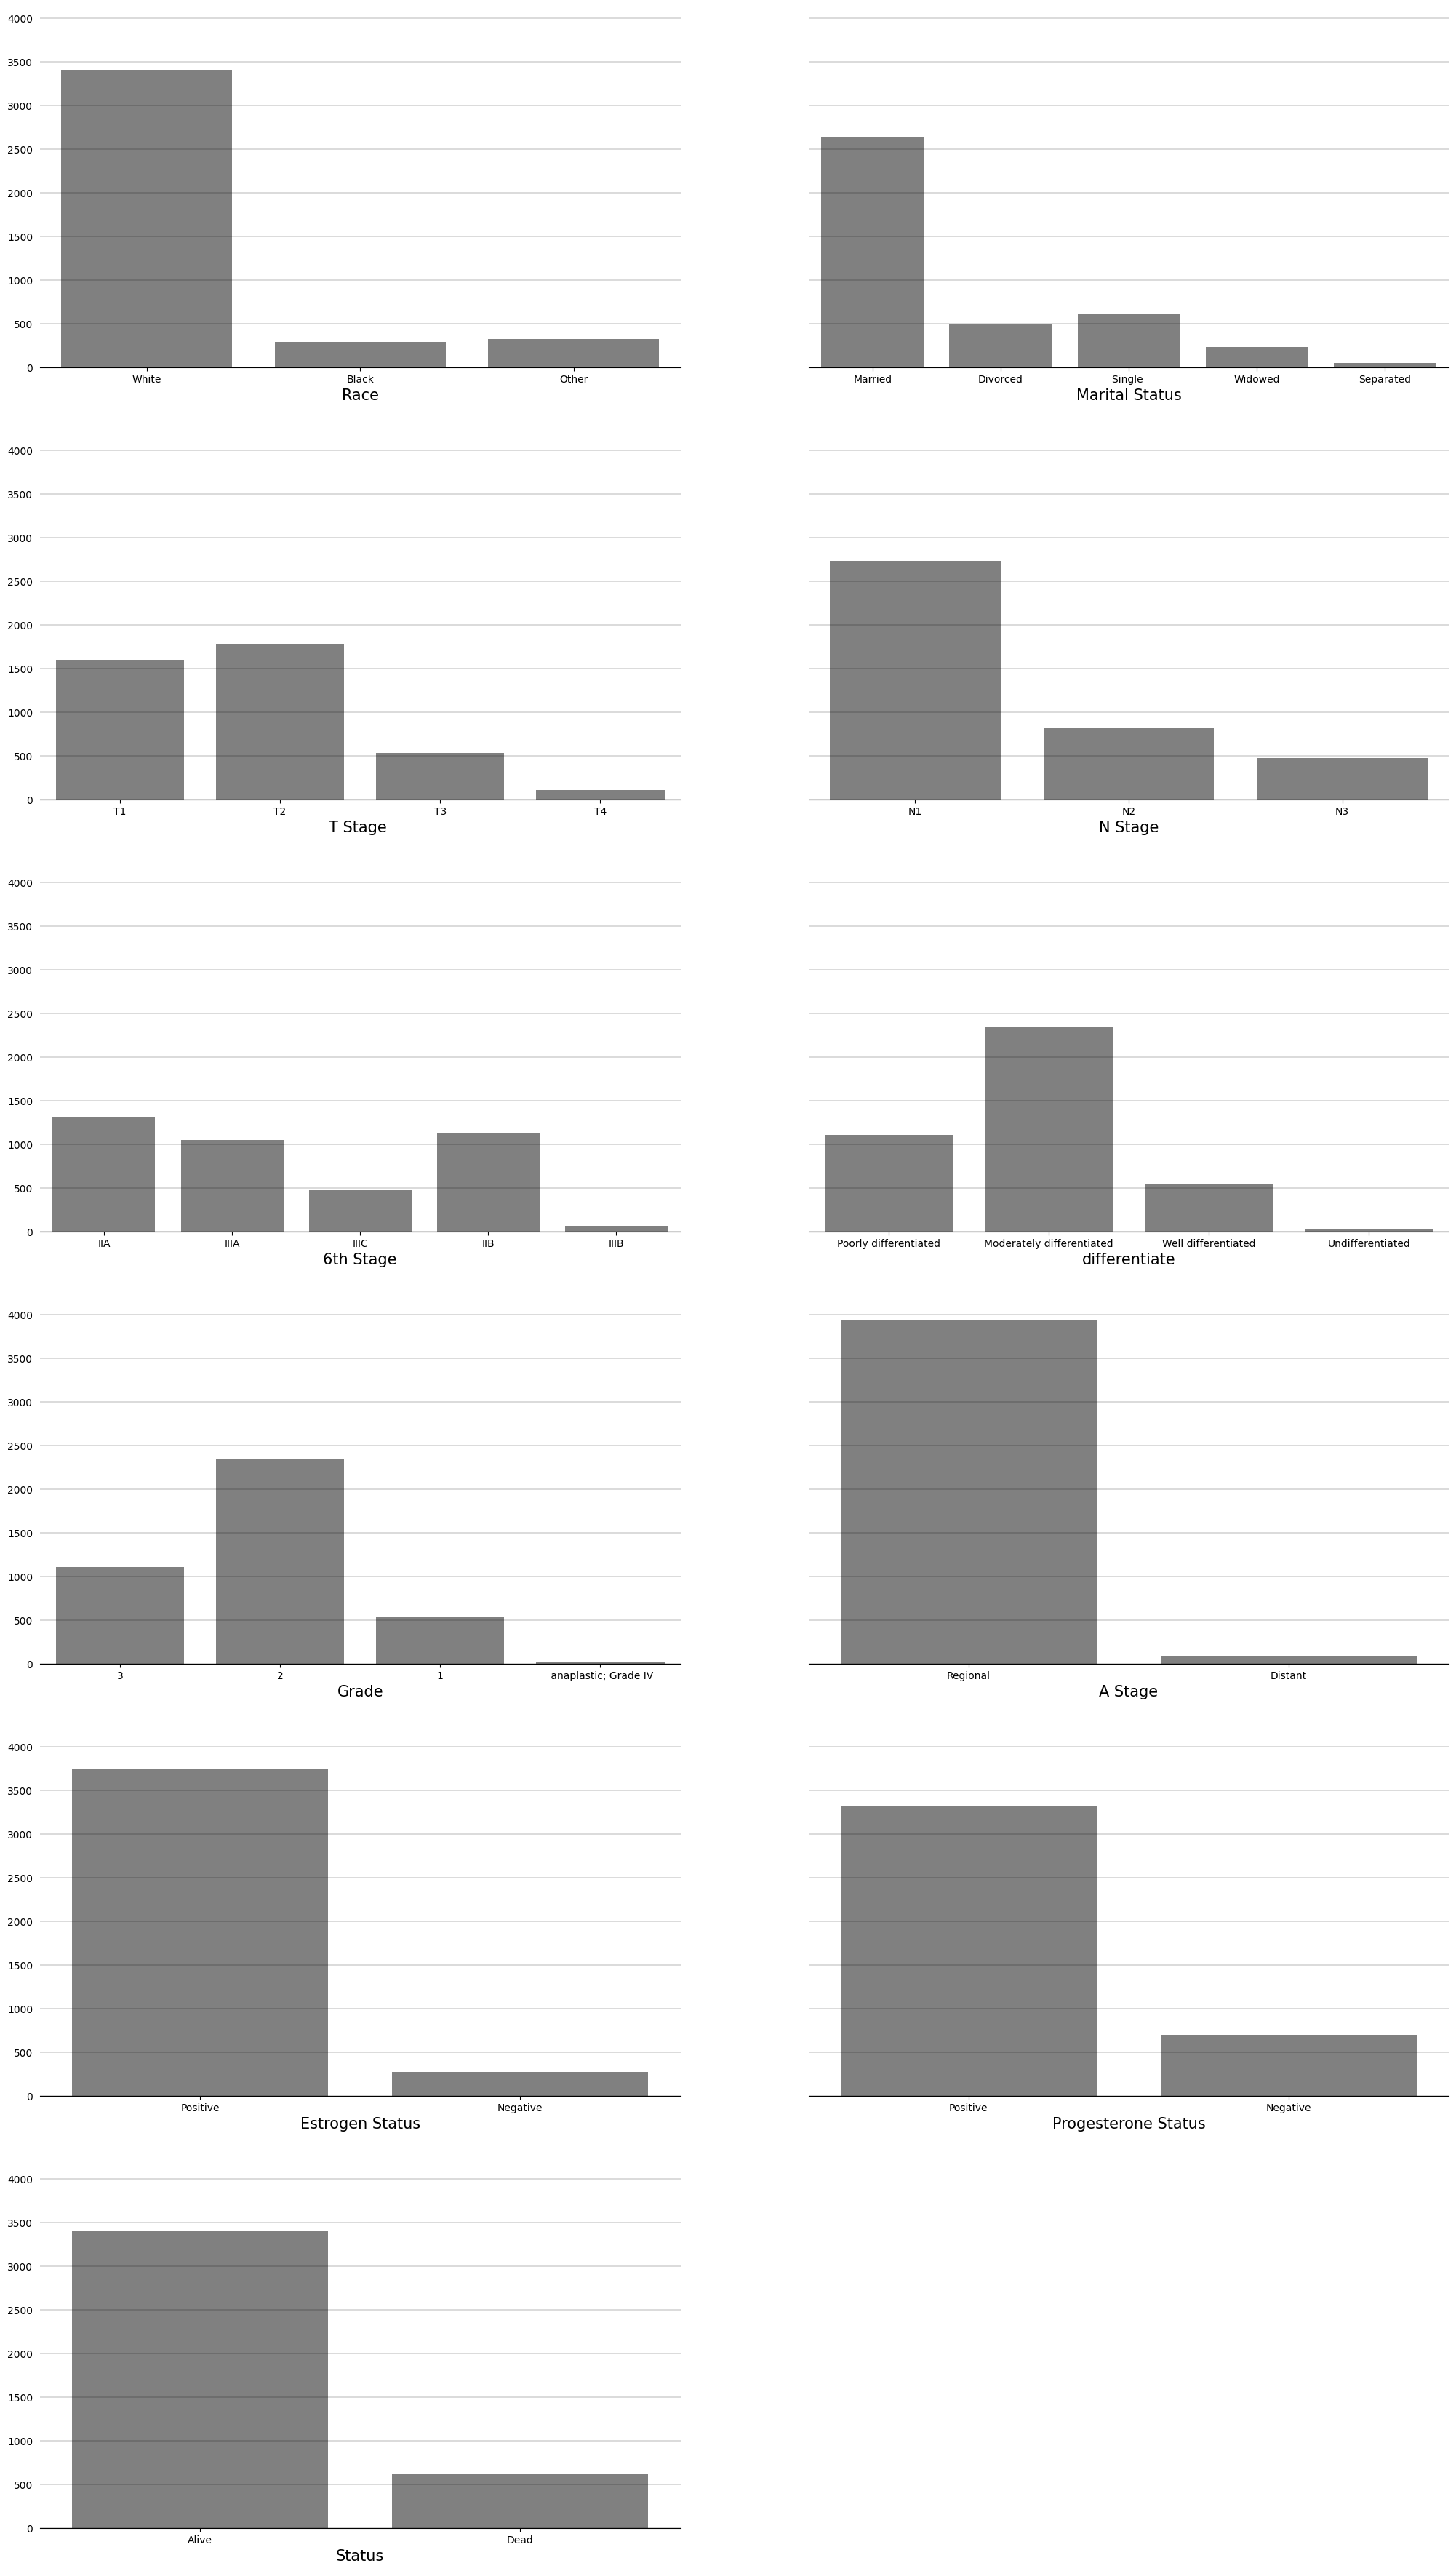

In [14]:
fig , axs = plt.subplots(6, 2, figsize = (25, 45), sharey=True)
for i , col in enumerate(categorical_columns):
    ax = axs[i//2][i%2]

    count_items(df, col, ax)

fig.delaxes(axs[5,1])
plt.show()

In [15]:
categorical_columns.remove("Status")


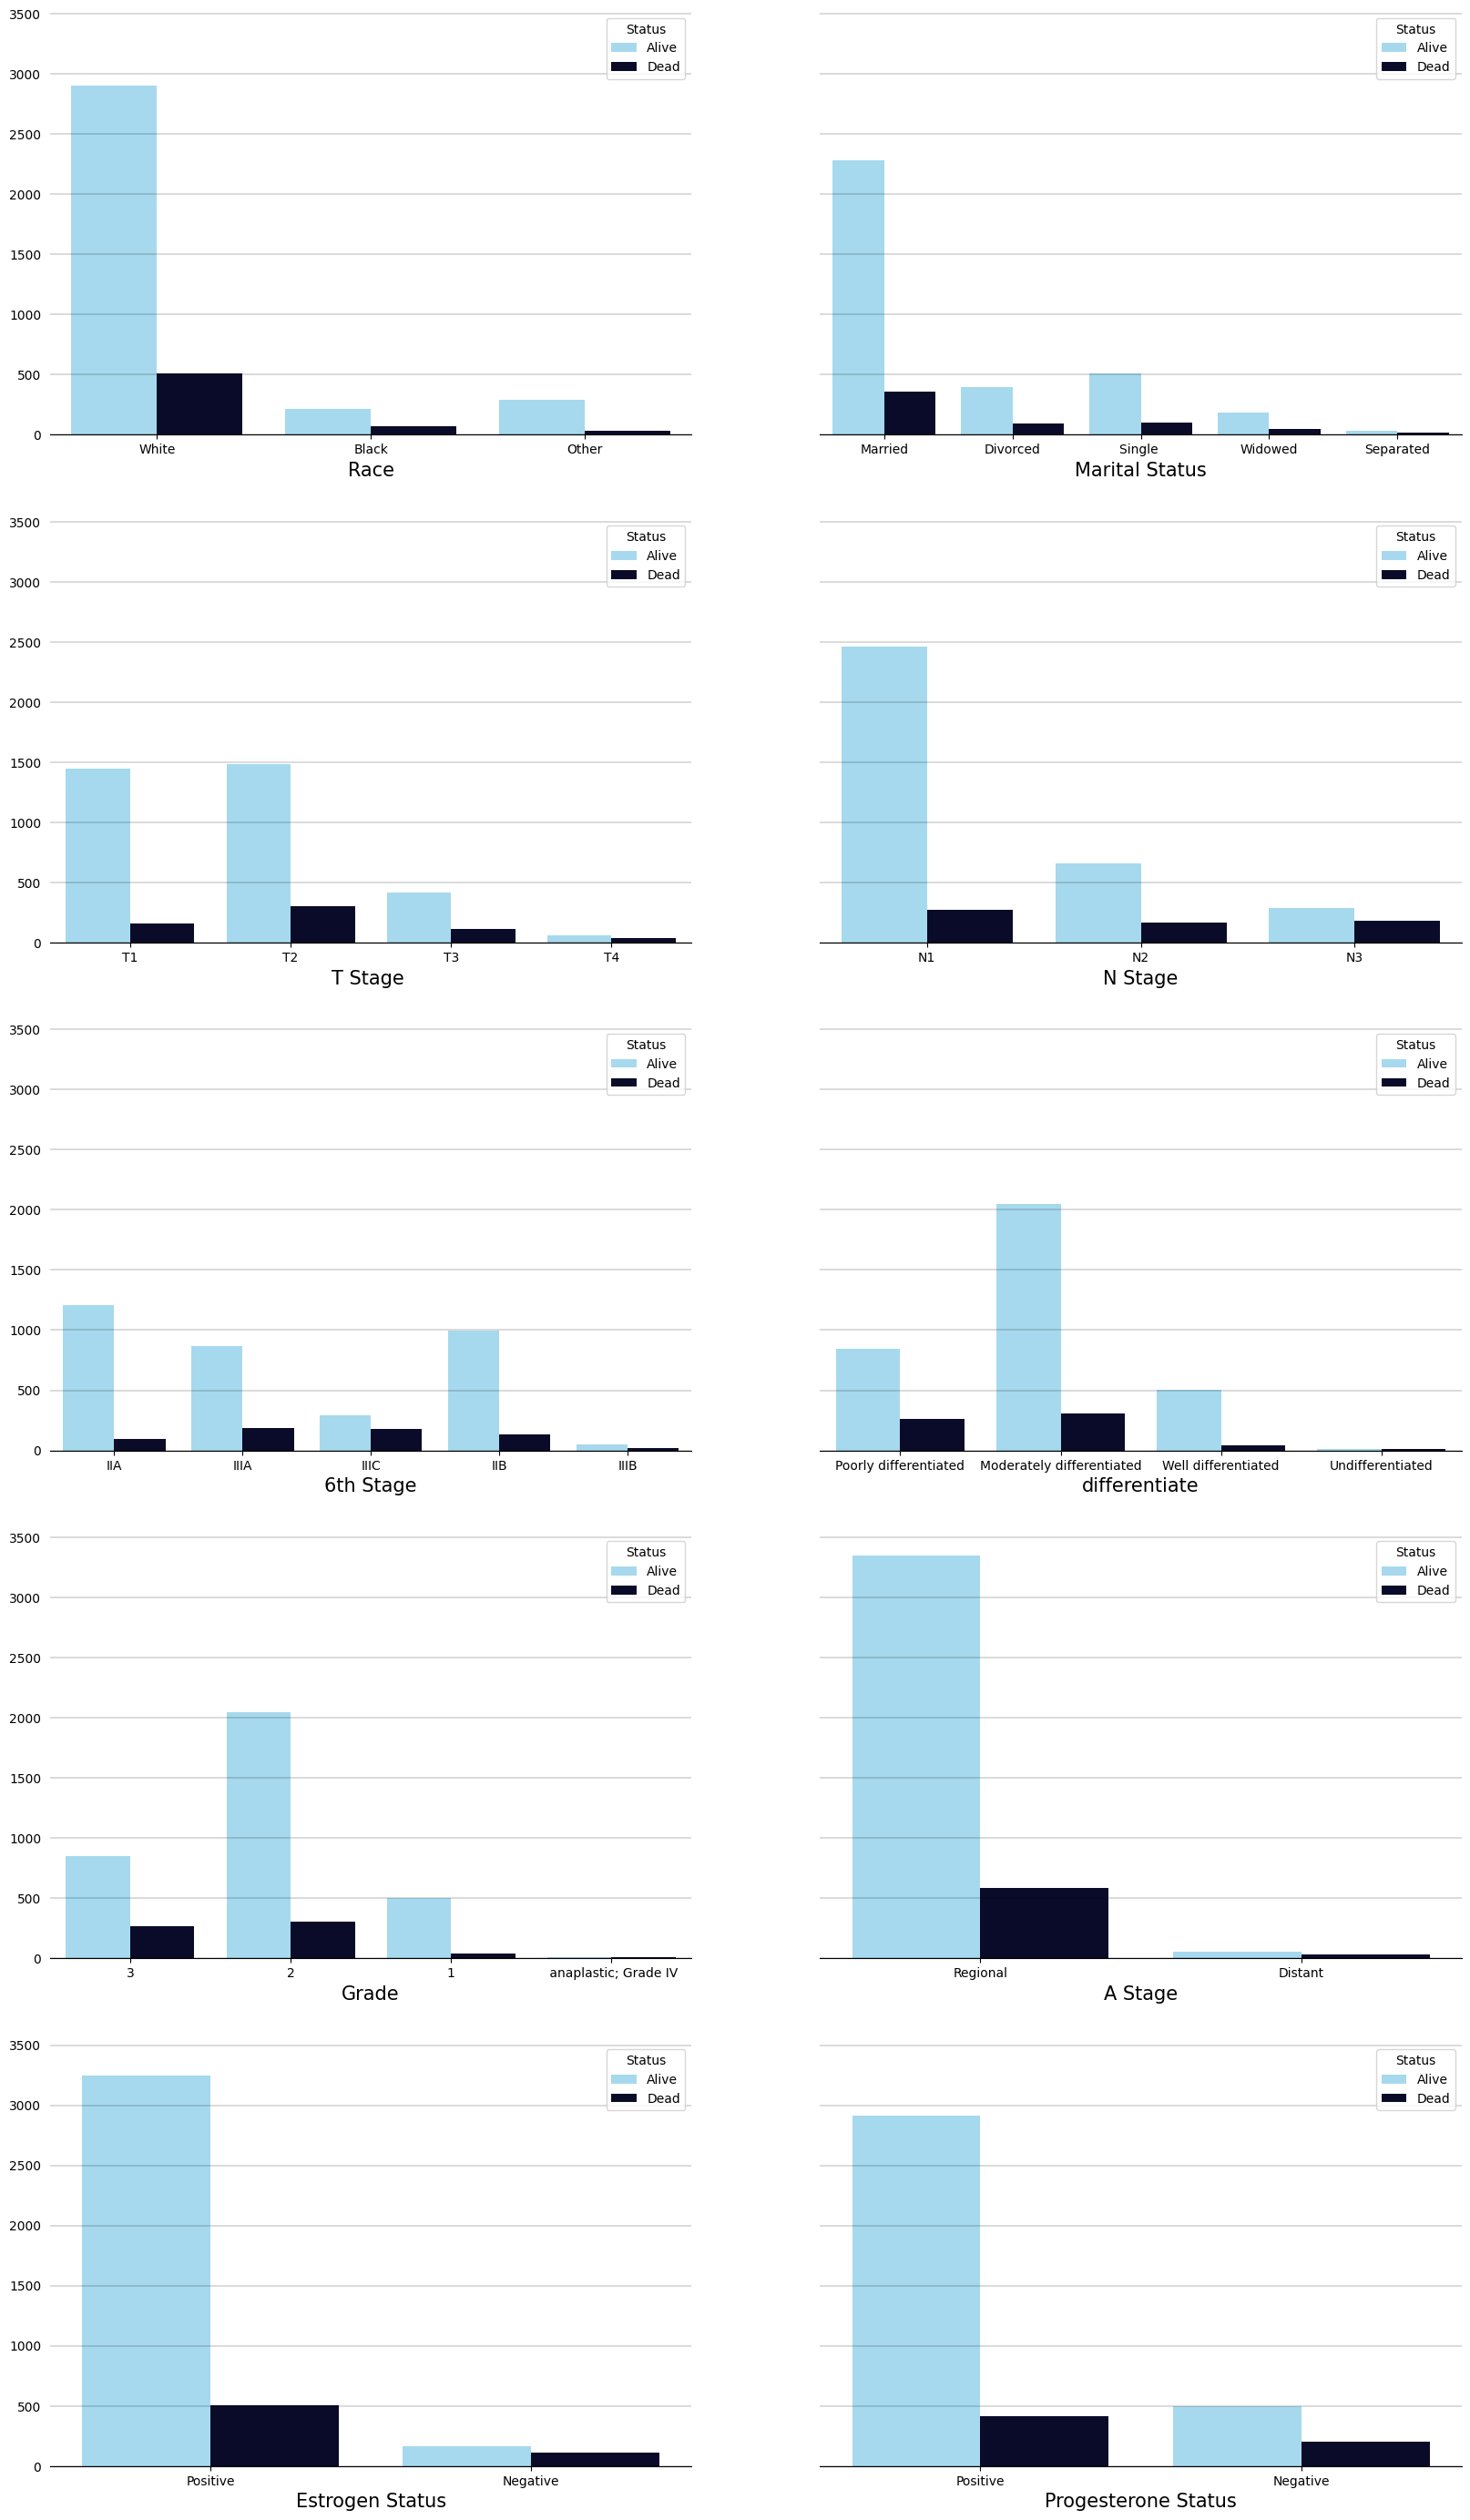

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(20, 35), sharey=True)

for i, col in enumerate(categorical_columns):
    ax = axs[i//2][i%2]
    
    count_items(df, col, ax, hue="Status", palette=[colors[2], colors[1]])

    
plt.show()

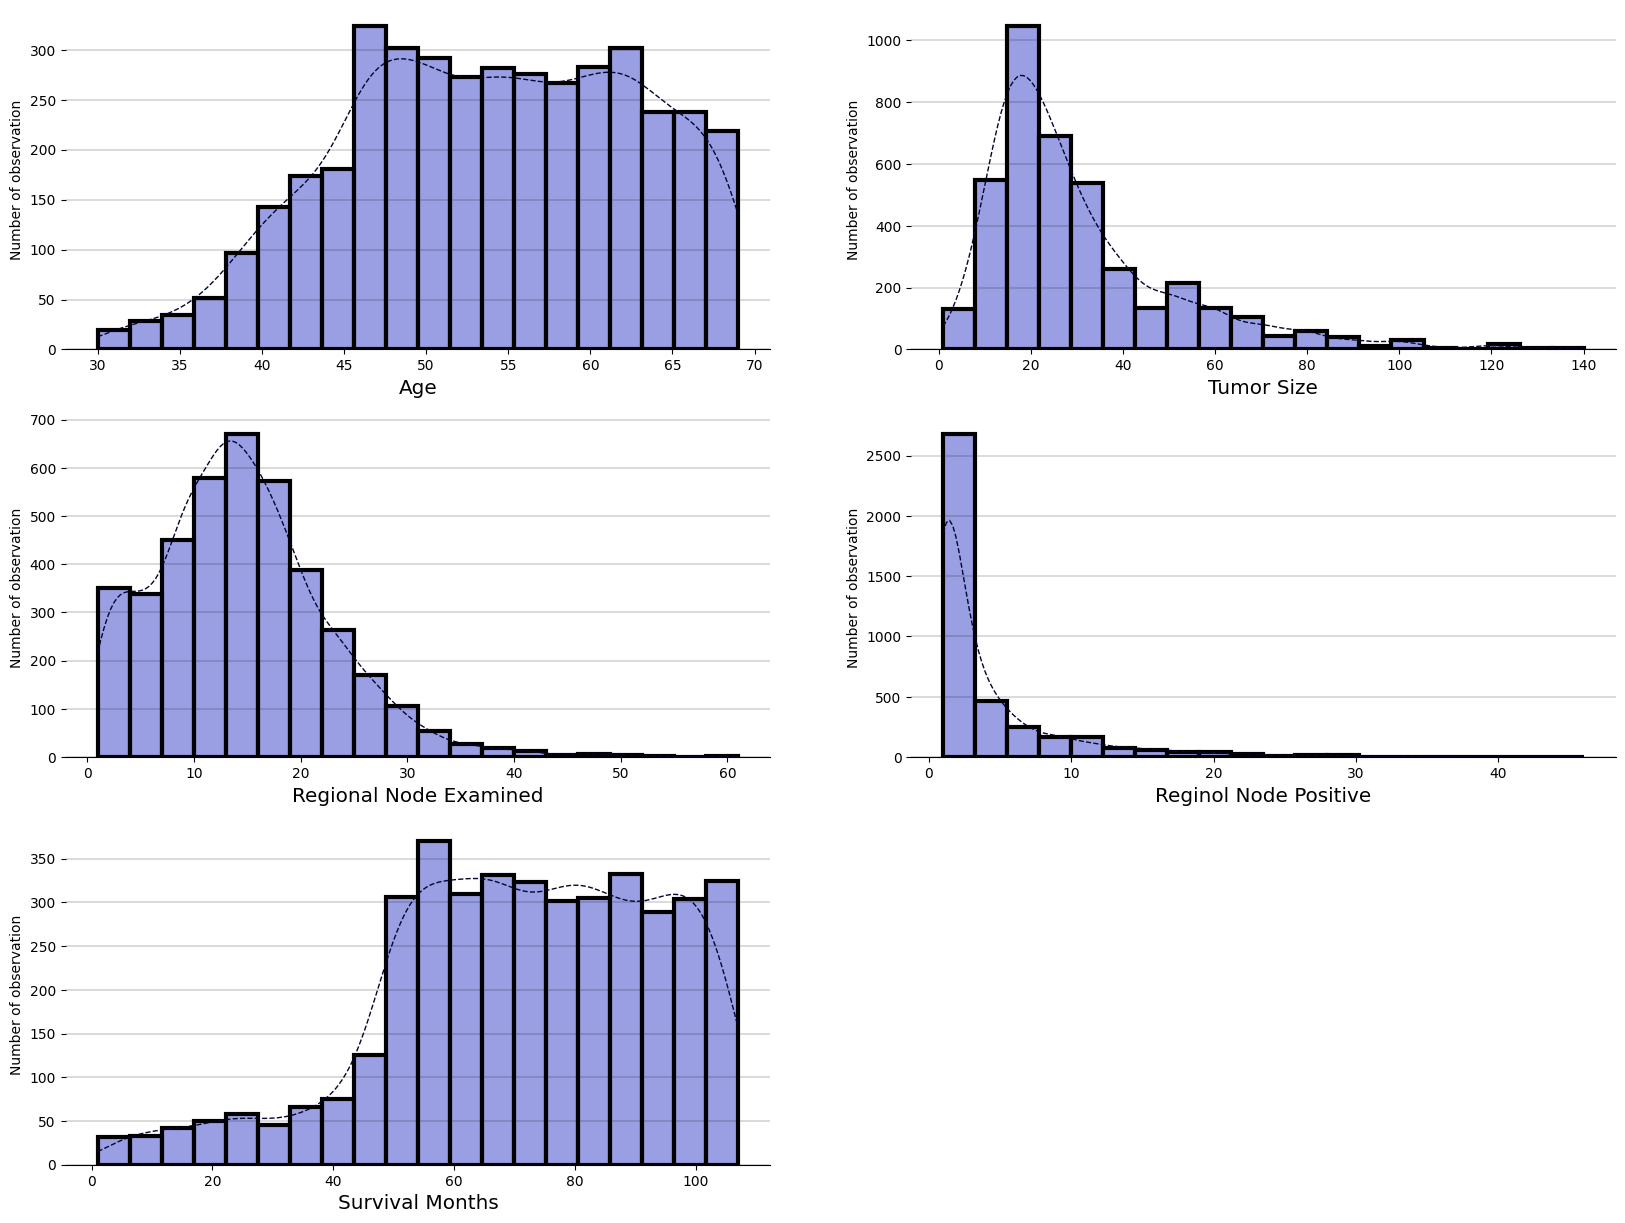

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

for i, col in enumerate(numerical_column):
    ax = axs[i//2][i%2]
    
    hist(df, col, ax)
    
fig.delaxes(axs[2,1])
    
plt.show()

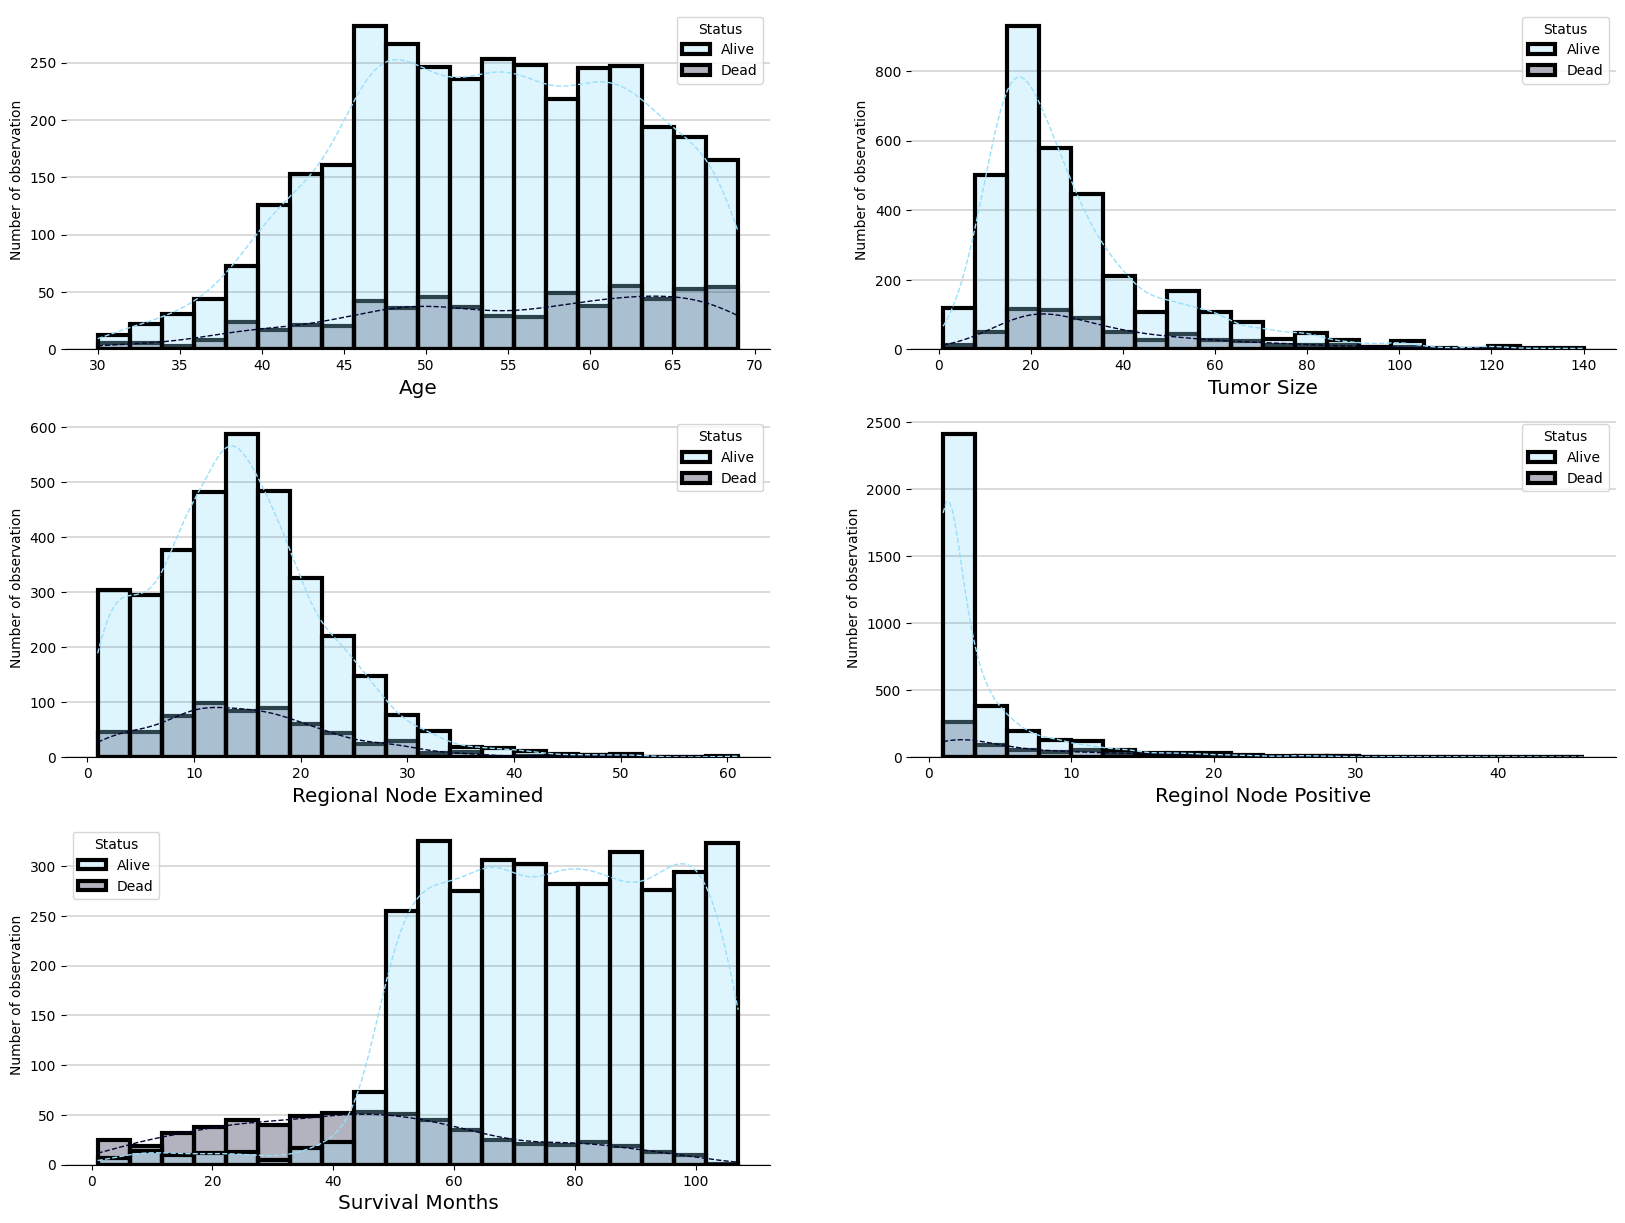

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

for i, col in enumerate(numerical_column):
    ax = axs[i//2][i%2]
    
    hist(df, col, ax, hue="Status", palette=[colors[2], colors[1]])
    
fig.delaxes(axs[2,1])
    
plt.show()


/var/folders/8j/l730nmk95mv1lzsmhx6ldt6w0000gn/T/ipykernel_36730/4128139544.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue,
/var/folders/8j/l730nmk95mv1lzsmhx6ldt6w0000gn/T/ipykernel_36730/4128139544.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue,
/var/folders/8j/l730nmk95mv1lzsmhx6ldt6w0000gn/T/ipykernel_36730/4128139544.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue,
/var/folders/8j/l730nmk95mv1lzsmhx6ldt6w0000gn/T/ipykernel_36730/4128139544.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x=x, y=y, palette=palette, hue=hue,
/var/folders/8j/l730nmk95mv1lzsmhx6ldt6w0000gn/T/ipykernel_36730/4128139544.py:3: FutureWarning: Passing `palette` without assigning `hue` i

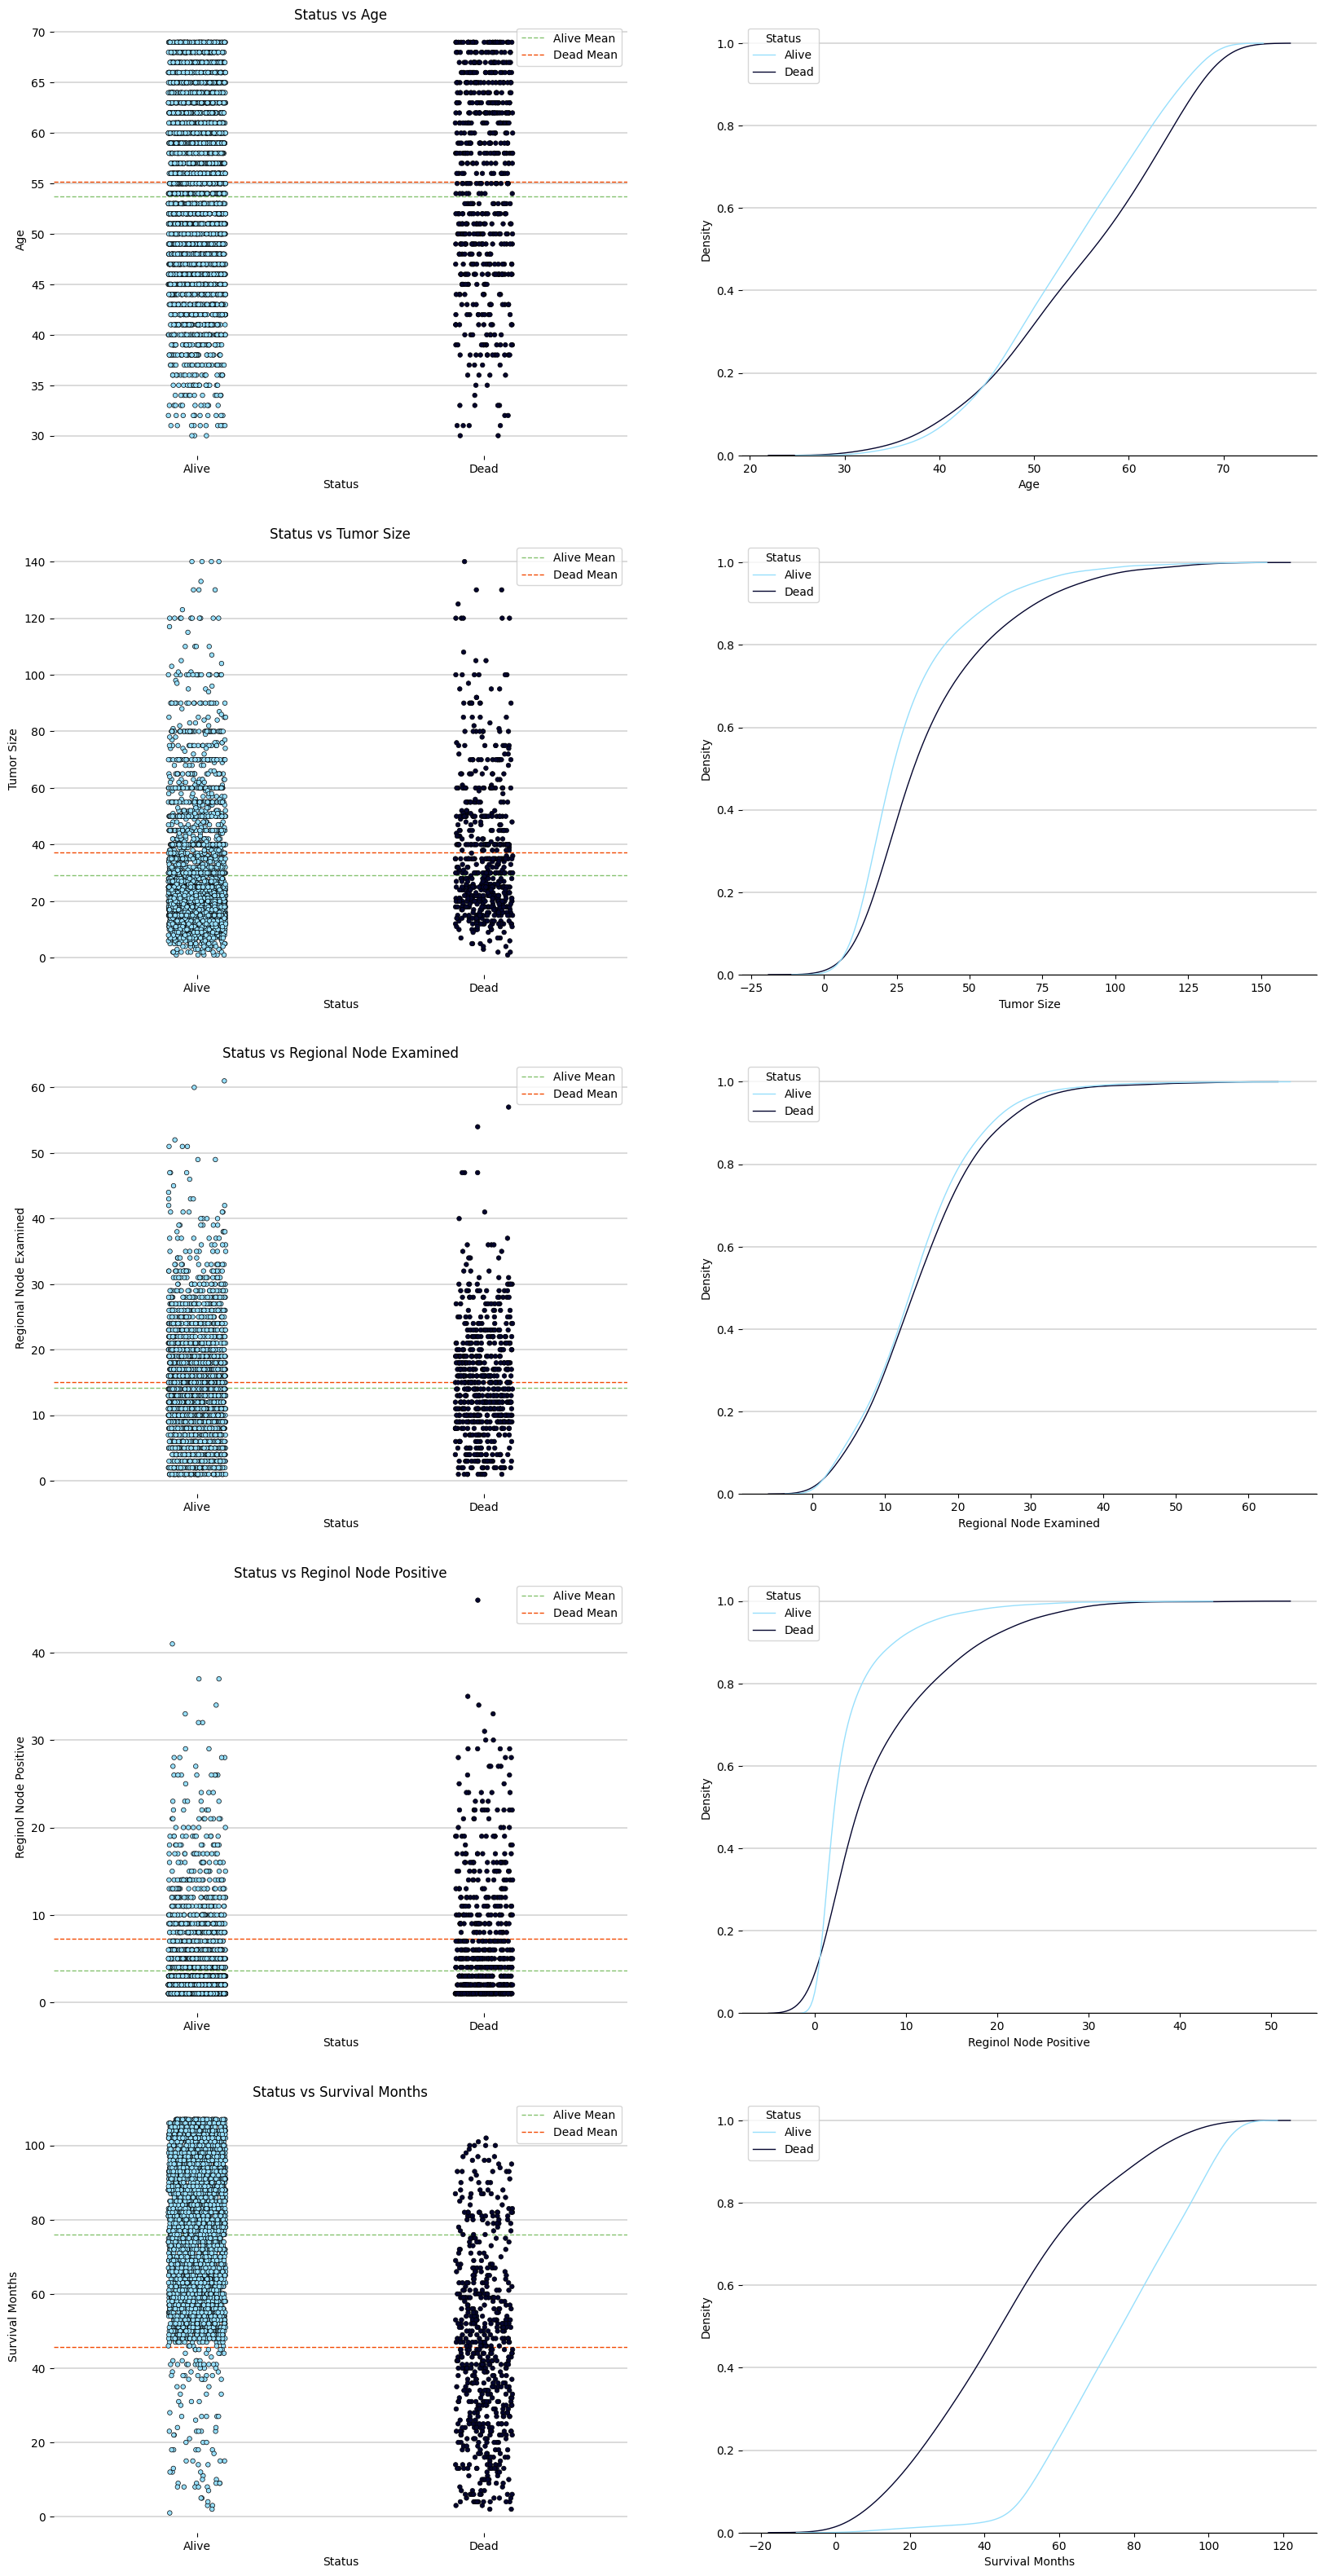

In [19]:
fig, axs = plt.subplots(5, 2, figsize=(20, 40))
i = 0
for col in numerical_column:
    
    ax_left = axs[i][0]
    ax_right = axs[i][1]
    
    strip(df, "Status", col, ax_left, palette=[colors[2], colors[1]])
    ax_left.axhline(np.mean(df[df["Status"] == "Alive"][col]), linestyle="--", color="#85C270", linewidth=1, label="Alive Mean")
    ax_left.axhline(np.mean(df[df["Status"] == "Dead"][col]), linestyle="--", color="#f24b04", linewidth=1, label="Dead Mean")
    ax_left.legend()
    
    cdf_plot(df, col, ax_right, hue="Status", palette=[colors[2], colors[1]])

    i += 1
    
    
    
plt.show()

In [20]:
numerical_column.remove("Age")


In [21]:
def numerics_vs_cat(cat_col, cat_order=None, num_cols=numerical_column, hue="Status", palette=[colors[2], colors[1]], xtick_rotation=0):
    fig, axs = plt.subplots(1, 4, figsize=(35, 10))

    for i, col in enumerate(numerical_column):

        bar(df, cat_col, col, axs[i], hue=hue, palette=palette, order=cat_order)
        axs[i].tick_params(axis="x", rotation=xtick_rotation)

    fig.suptitle(f"Categorical feature: {cat_col}", fontsize=25, fontweight='bold', y=0.92, x=0.25)


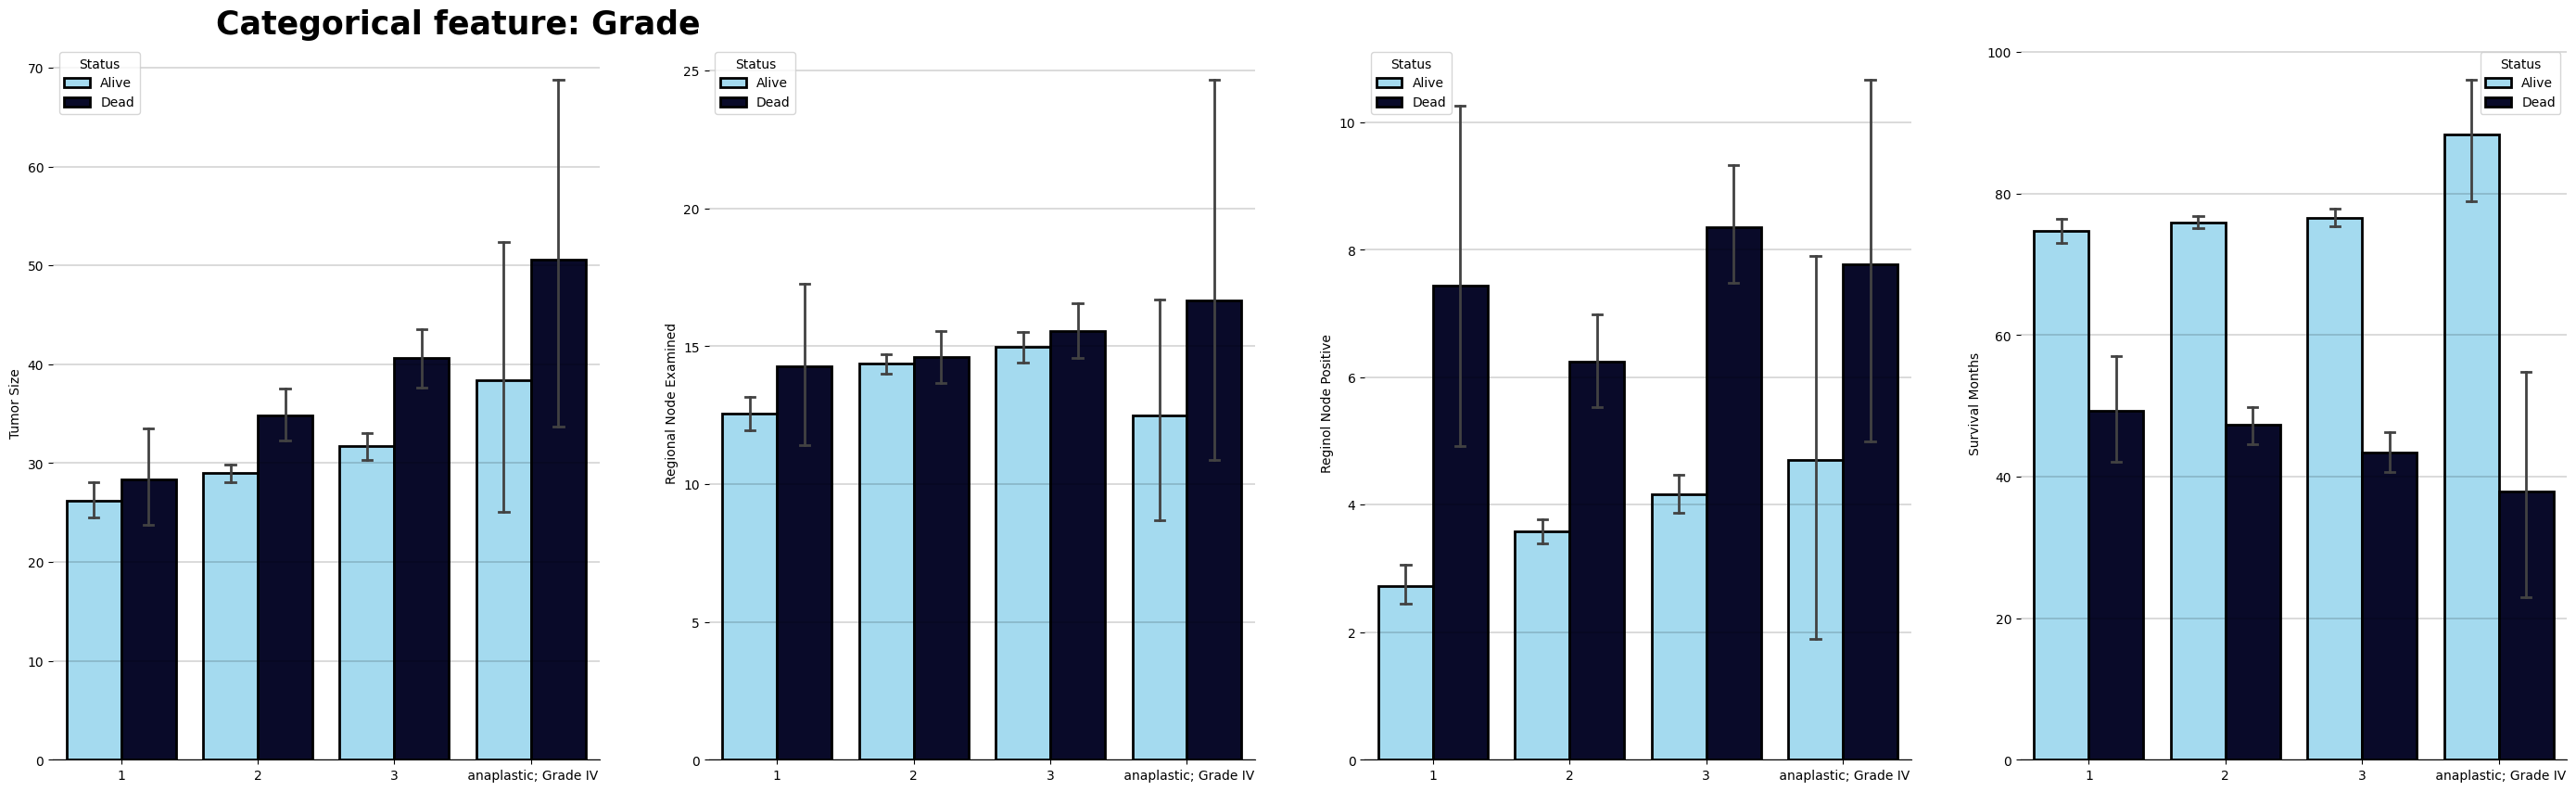

In [22]:
numerics_vs_cat("Grade", ["1", "2", "3", " anaplastic; Grade IV"])
plt.show()


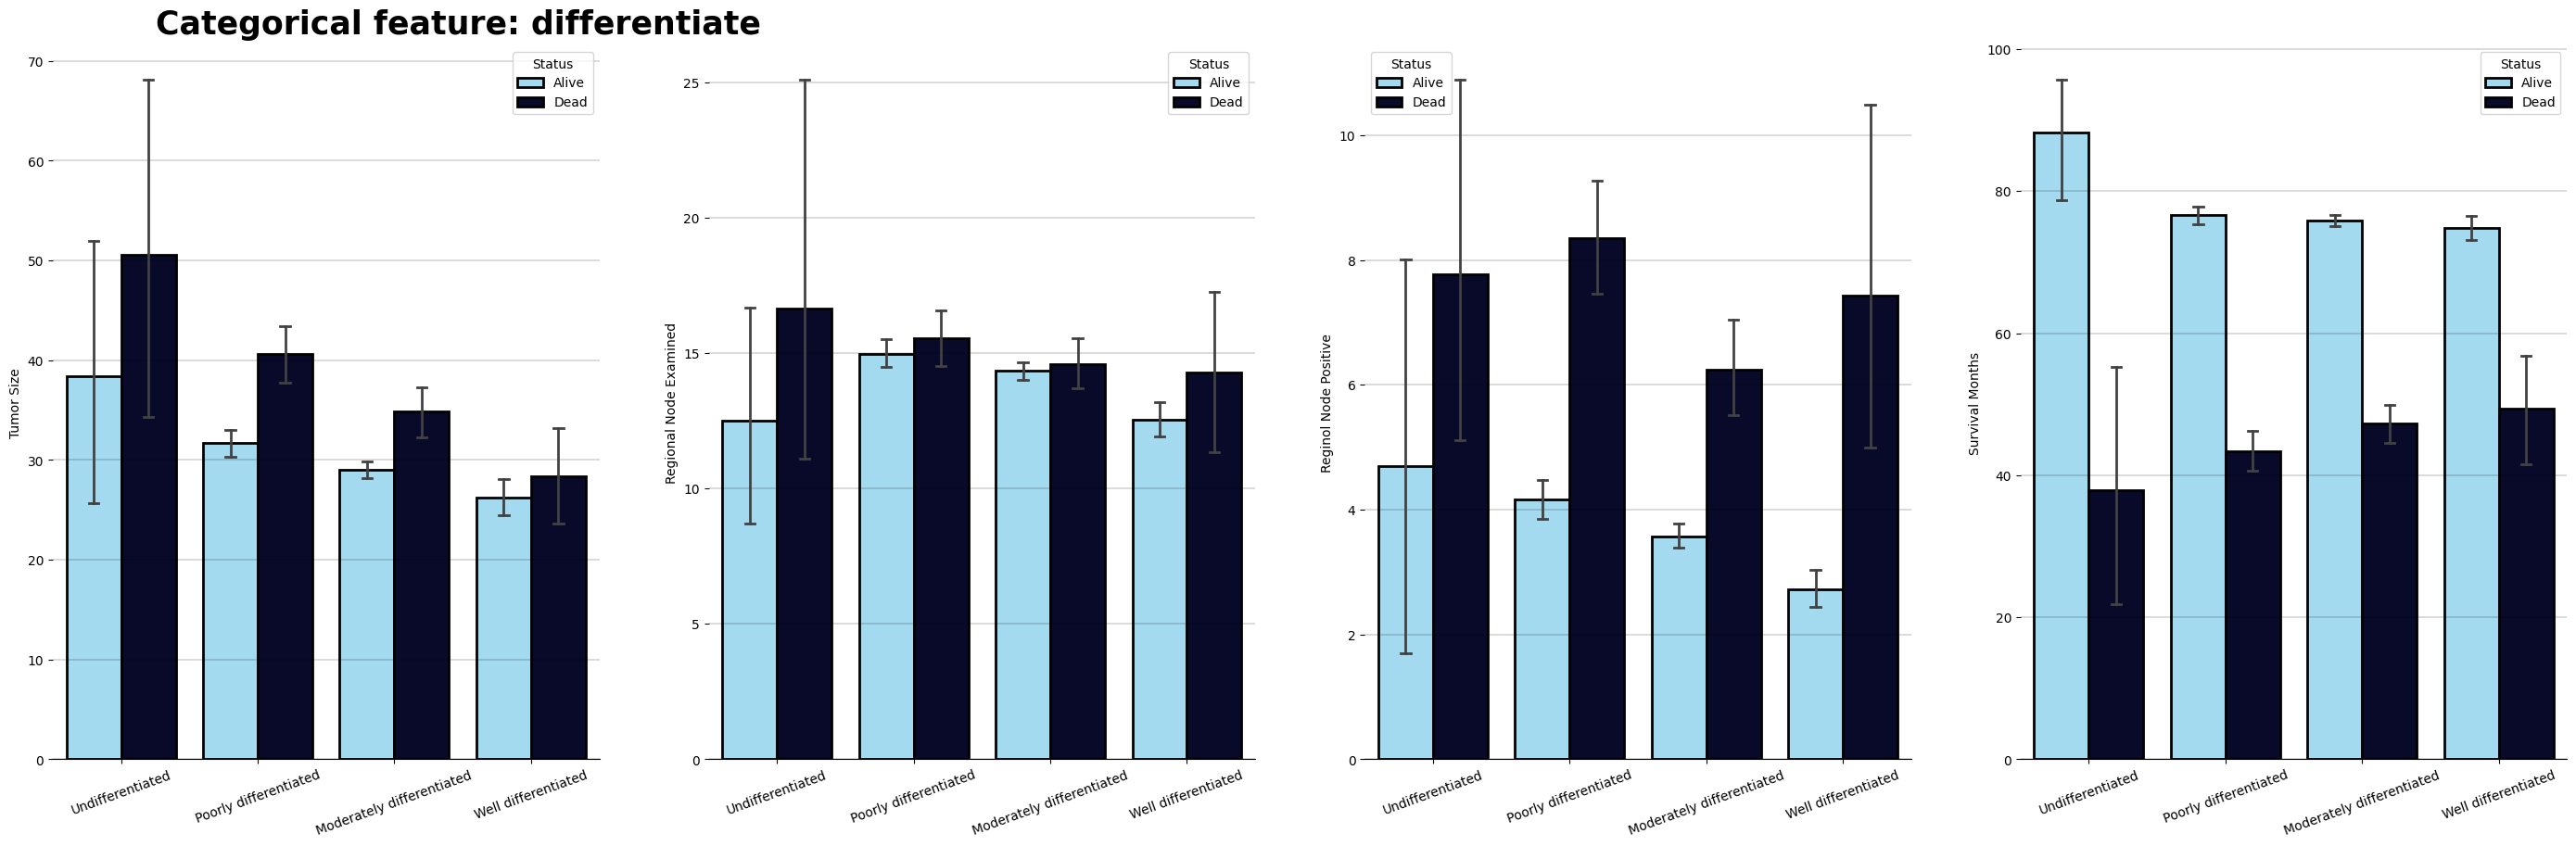

In [23]:
numerics_vs_cat("differentiate", cat_order=["Undifferentiated", "Poorly differentiated", "Moderately differentiated", "Well differentiated"],
                xtick_rotation=20)
plt.show()

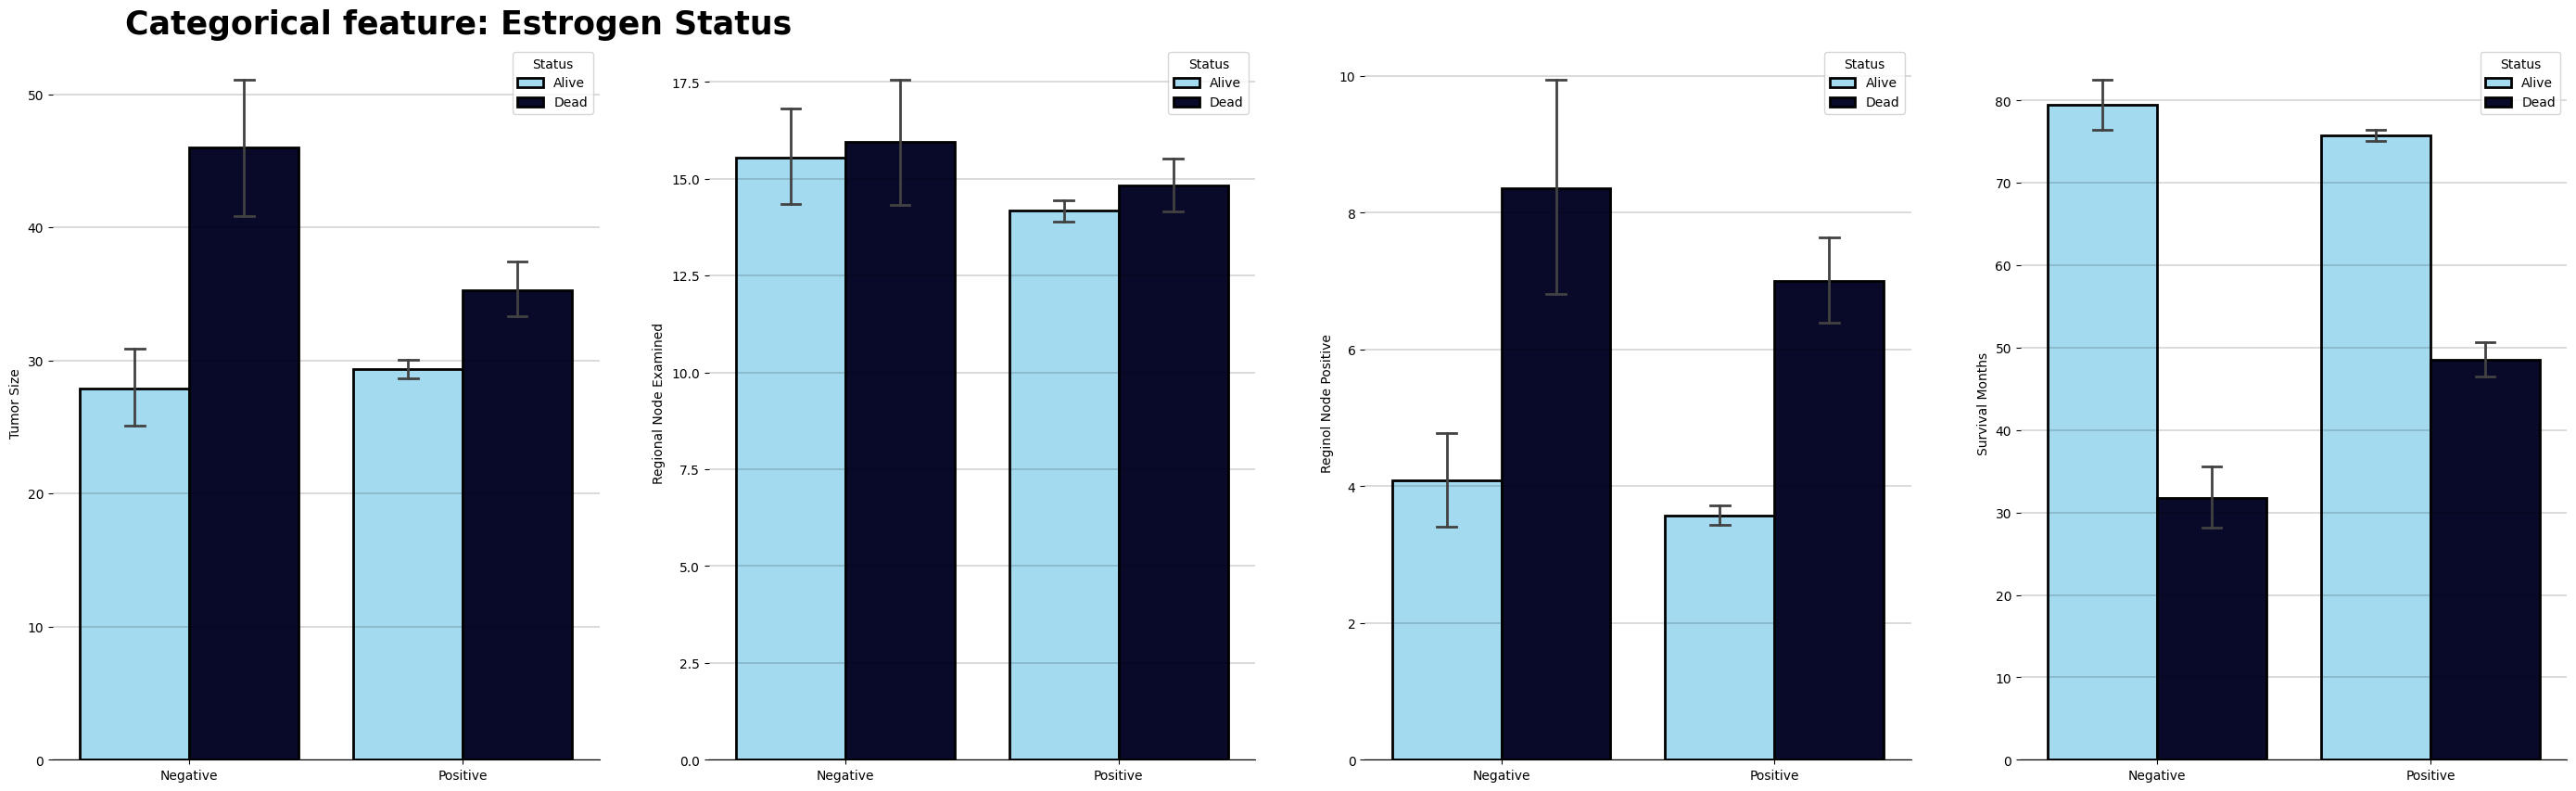

In [24]:
numerics_vs_cat("Estrogen Status", cat_order=["Negative", "Positive"])
plt.show()

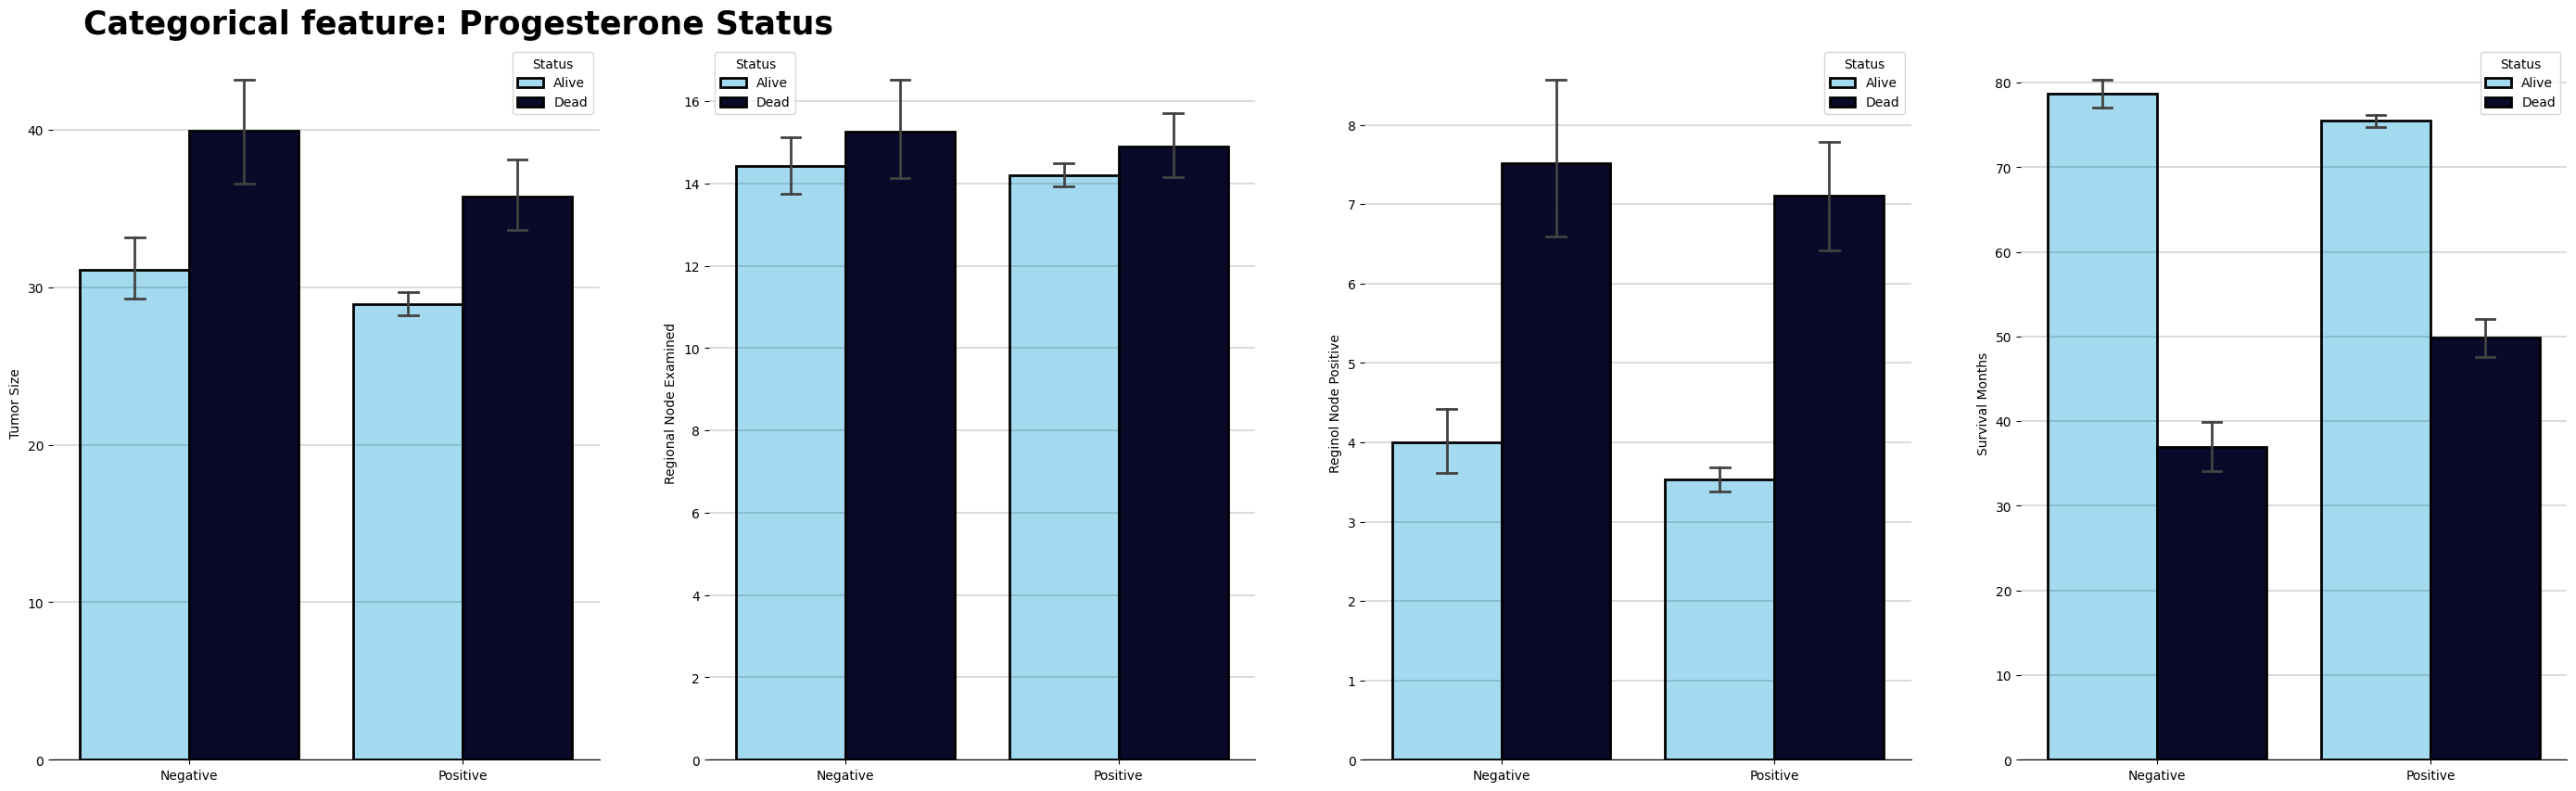

In [25]:
numerics_vs_cat("Progesterone Status", cat_order=["Negative", "Positive"])
plt.show()

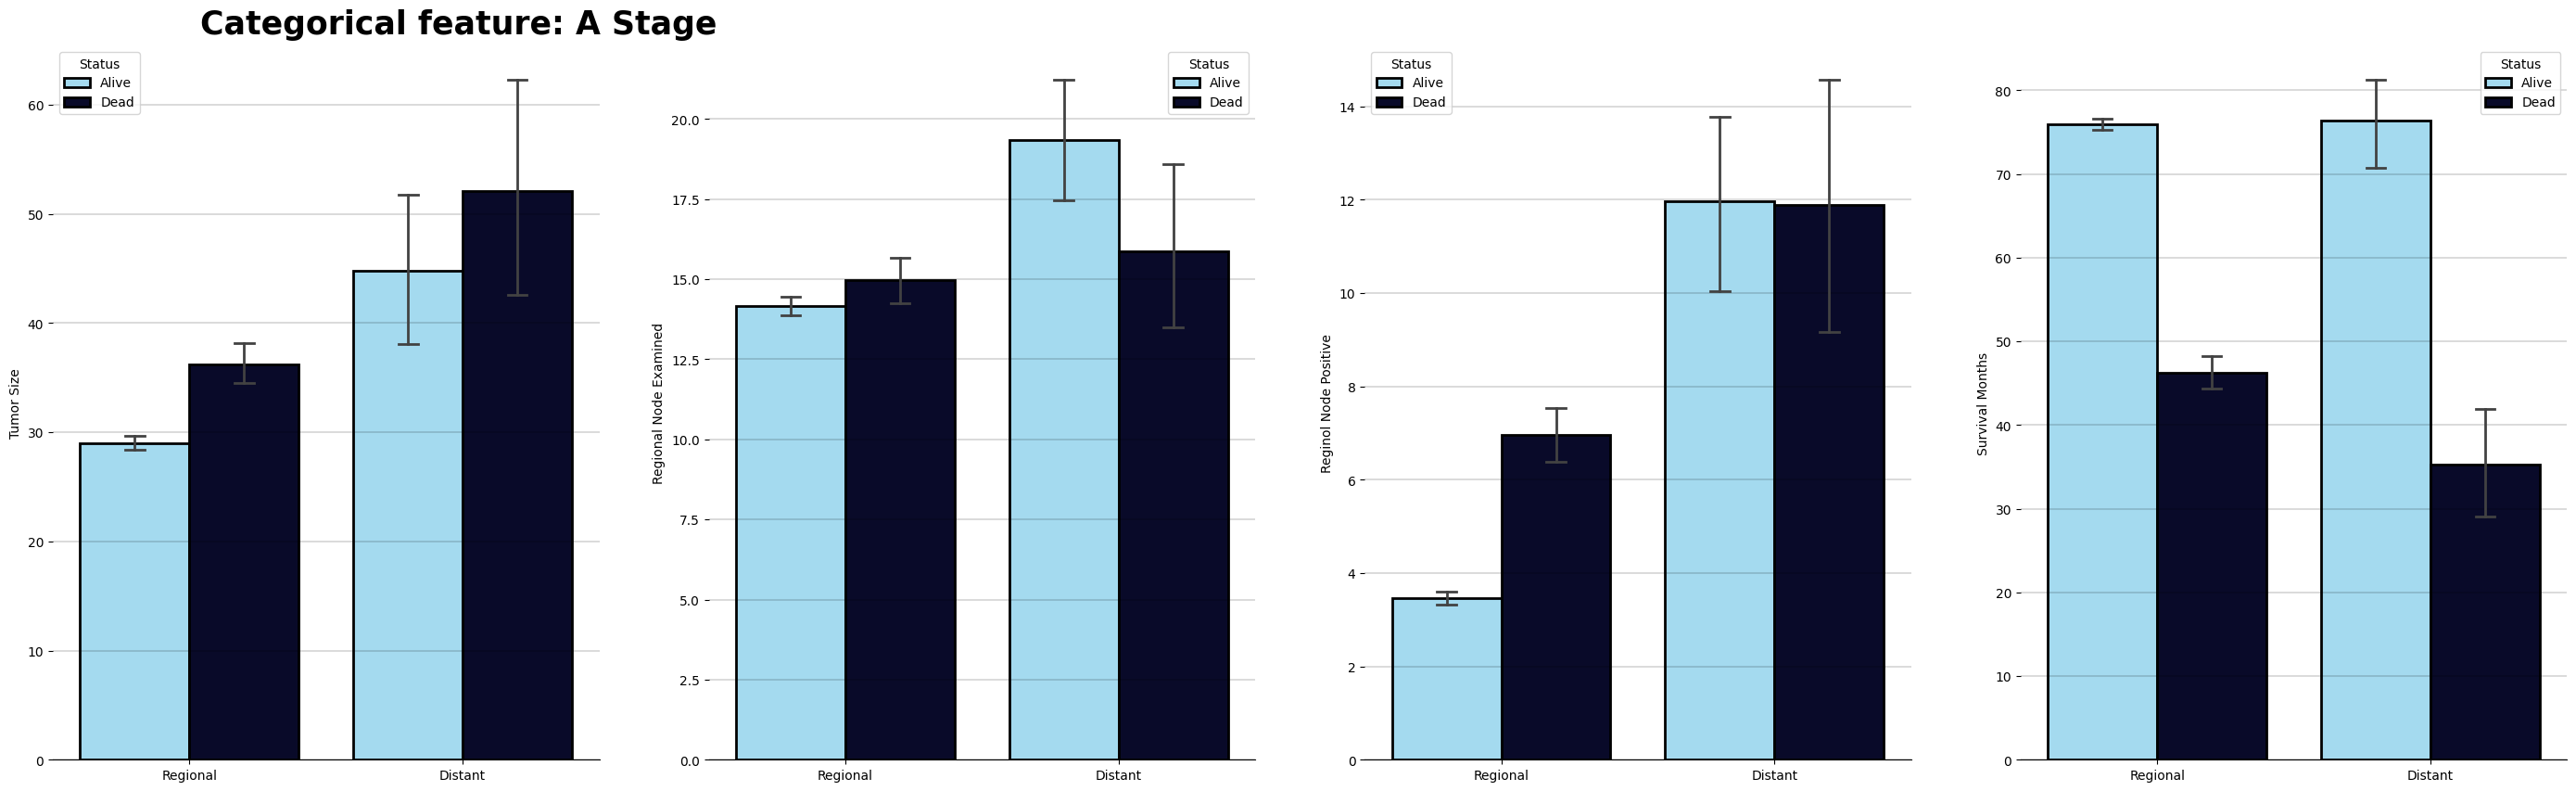

In [26]:
numerics_vs_cat("A Stage")
plt.show()


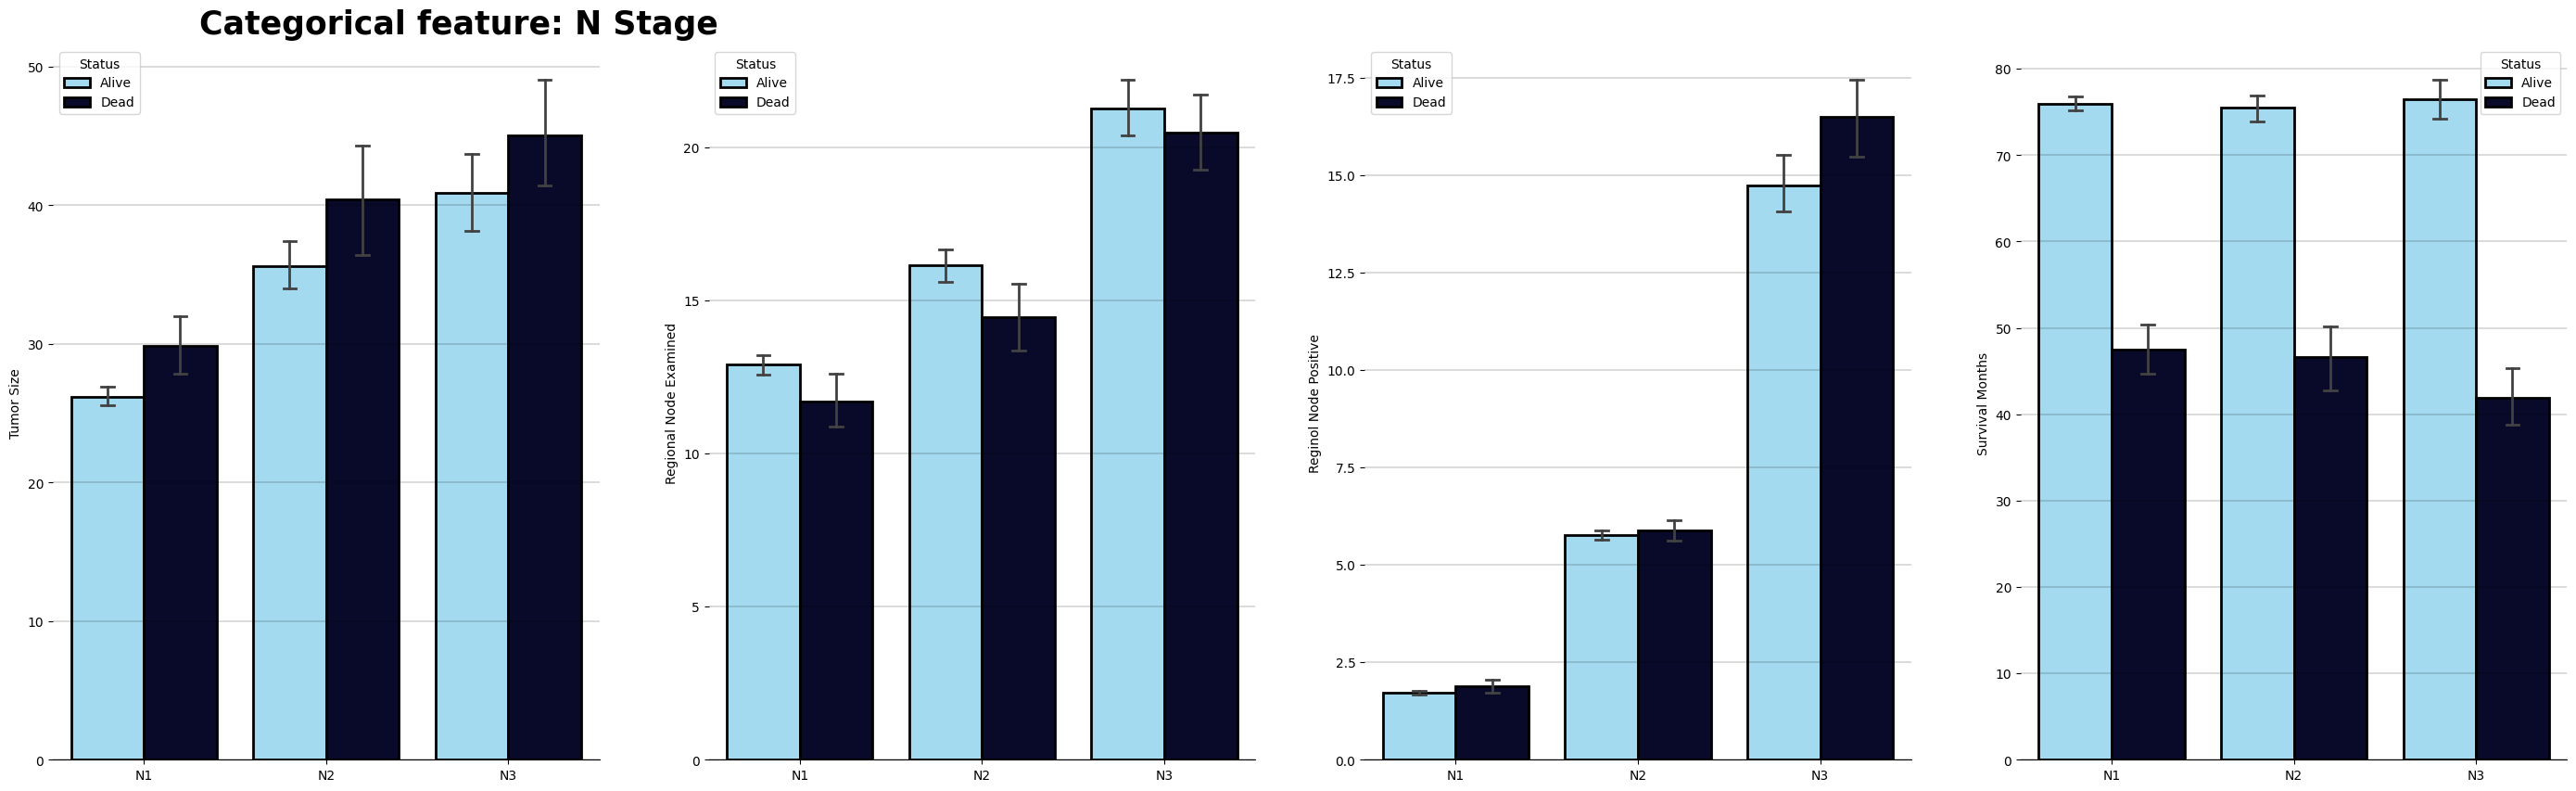

In [27]:
numerics_vs_cat("N Stage")
plt.show()

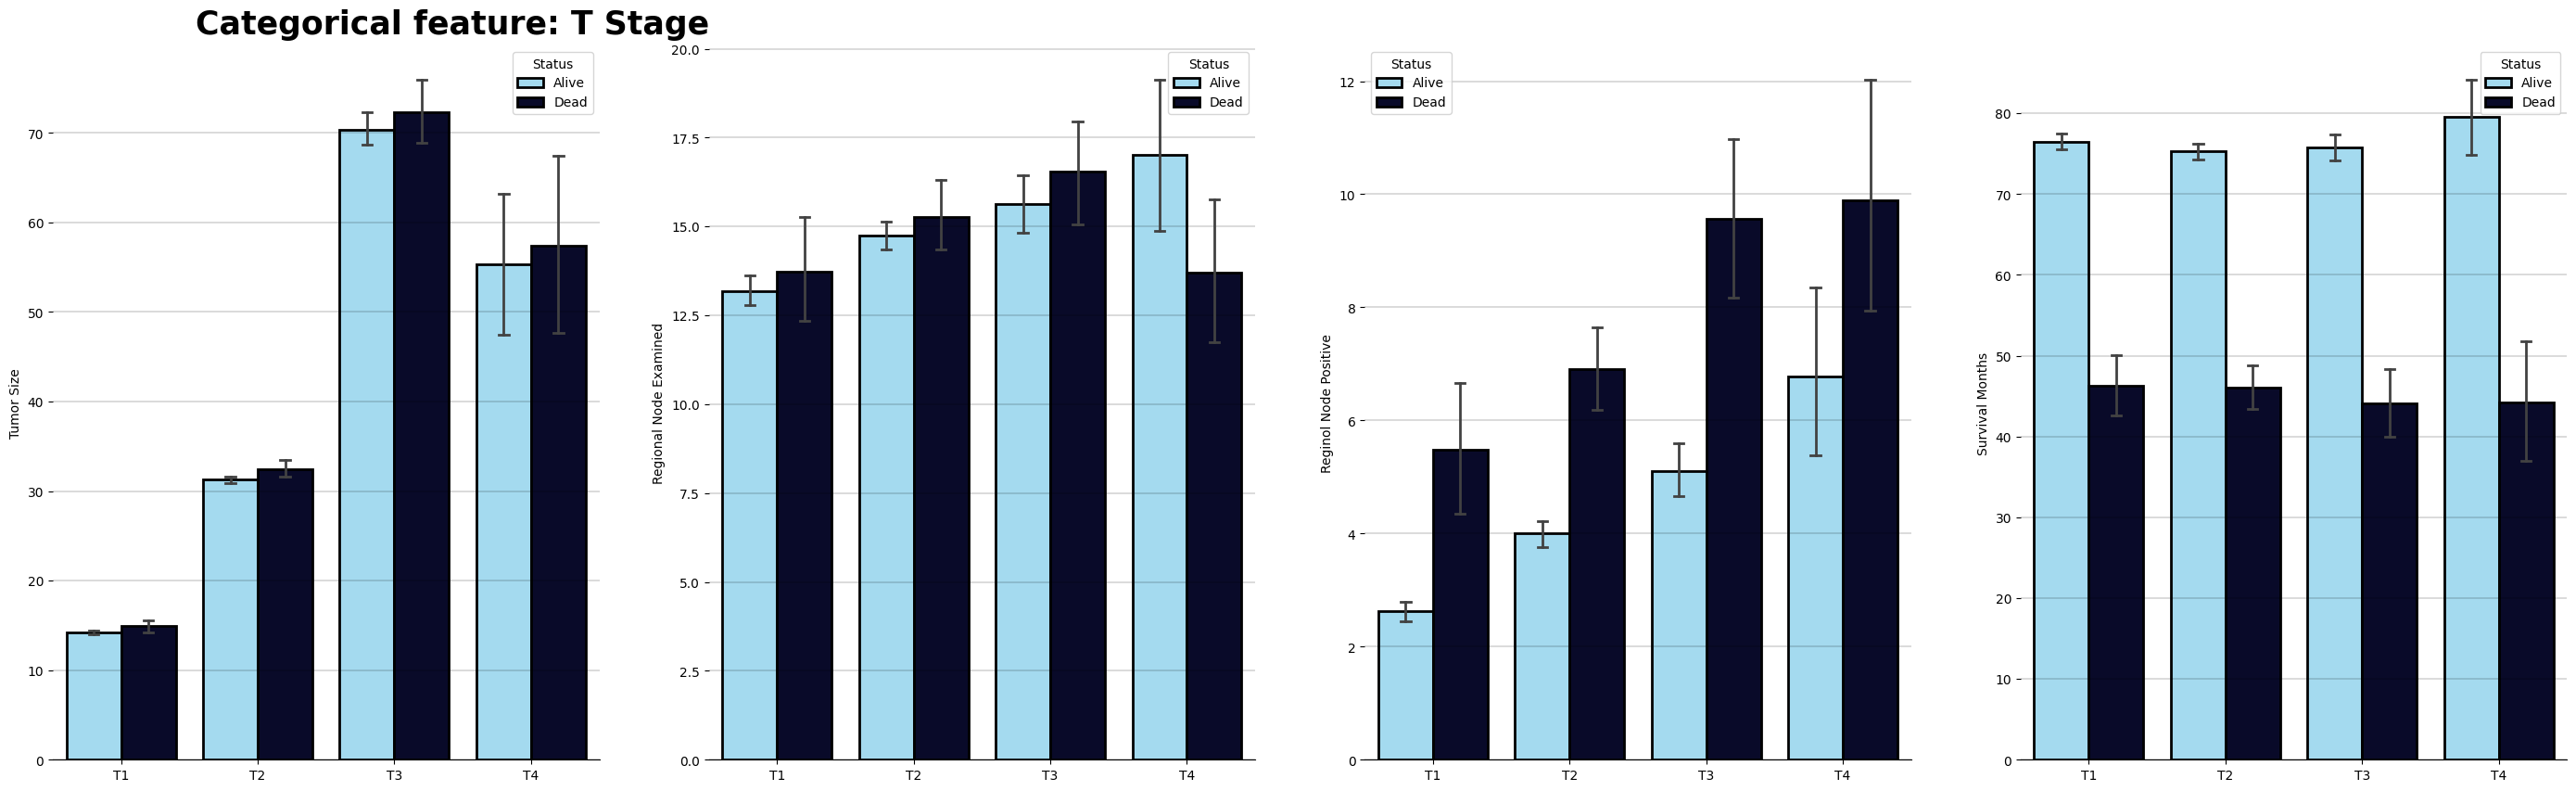

In [28]:
numerics_vs_cat("T Stage ")
plt.show()

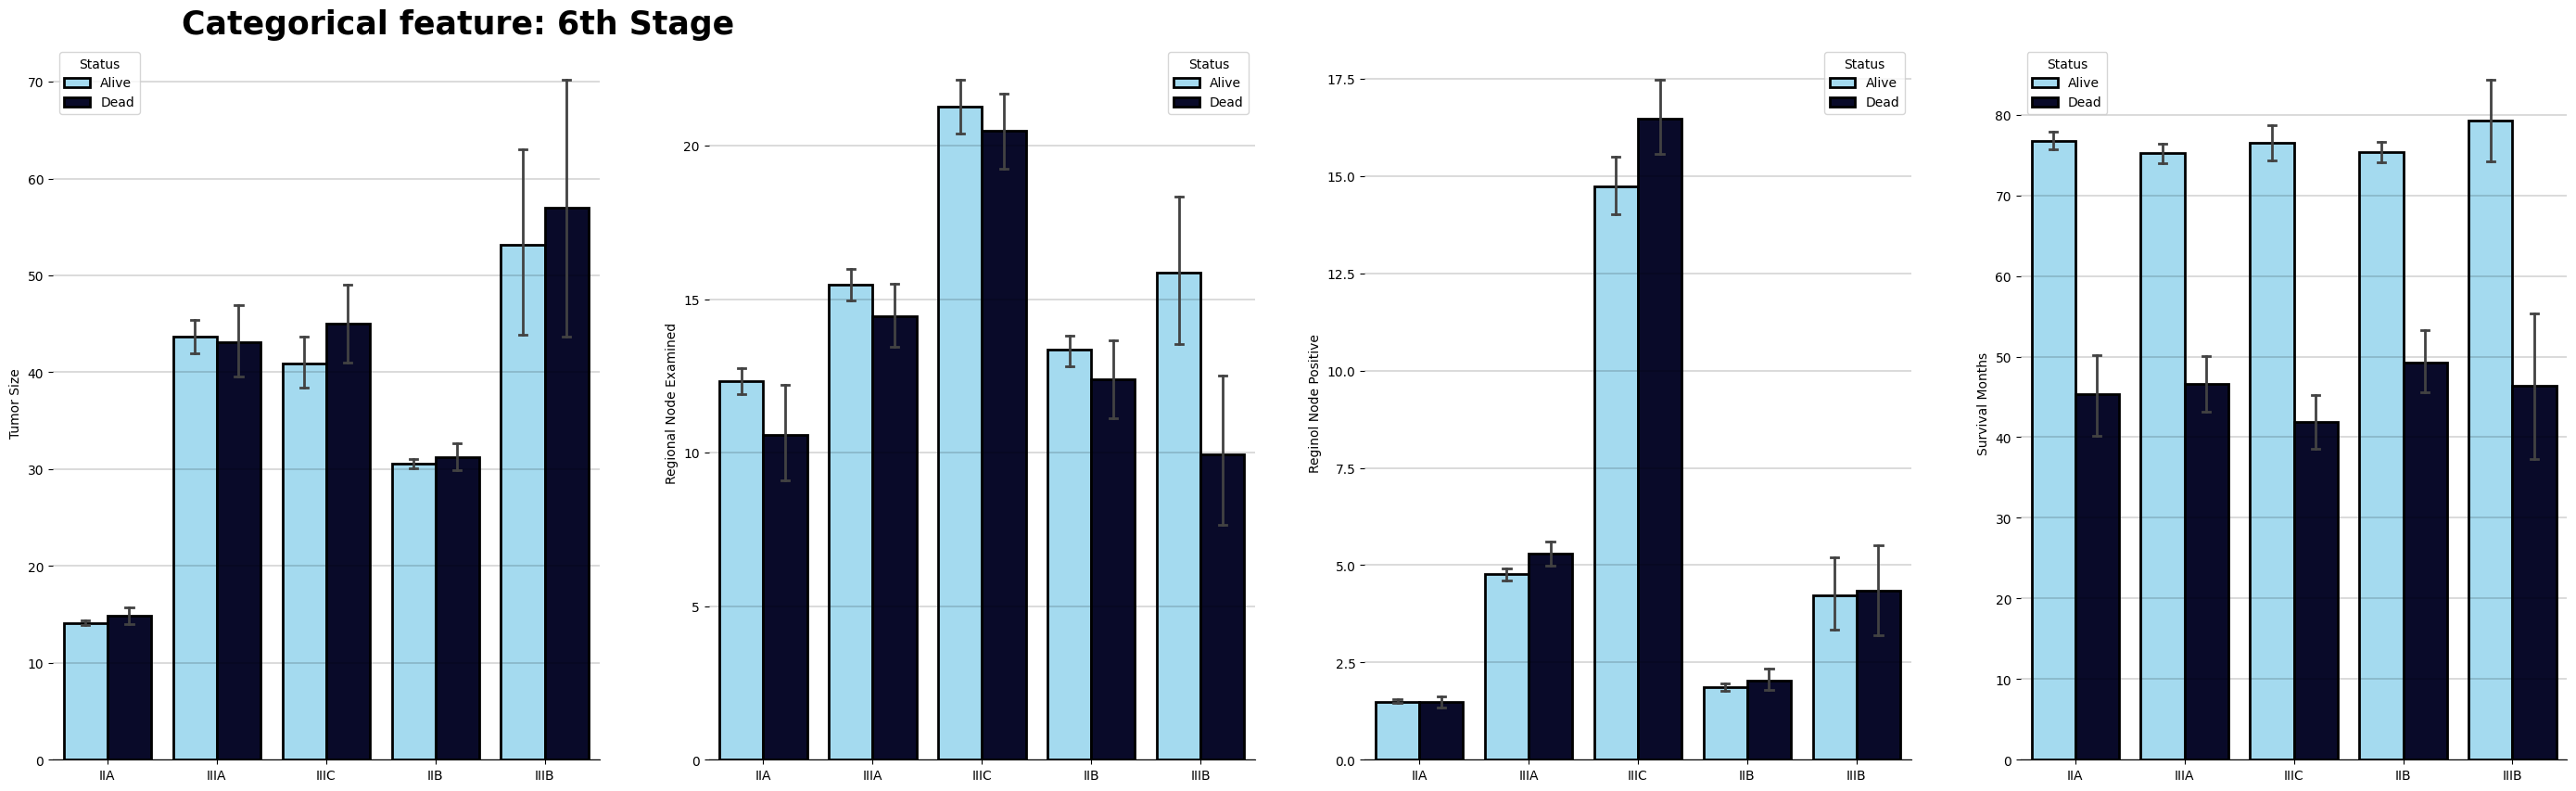

In [29]:
numerics_vs_cat("6th Stage")
plt.show()

In [30]:
numerical_column.append("Age")


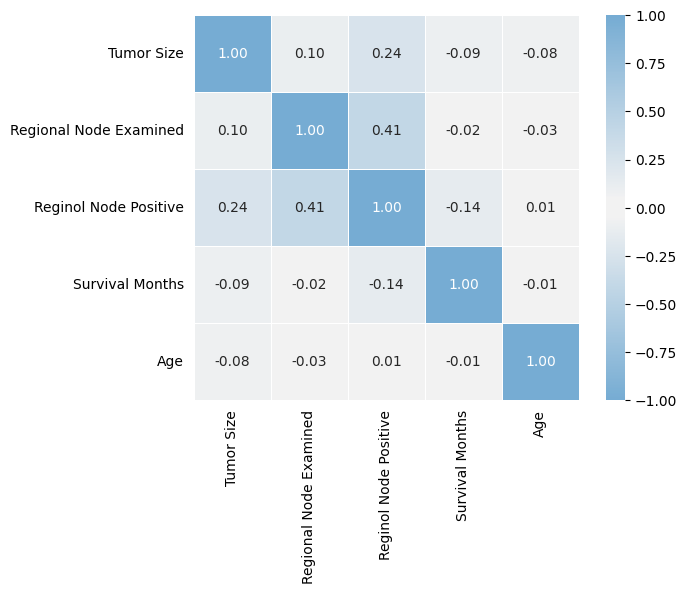

In [31]:
corr = df[numerical_column].corr()
 
# I create my own palette to use
palette = sns.diverging_palette(236, 236, s=57, l=68, as_cmap=True, sep=15)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor="white",
               vmin=-1, vmax=1, fmt=".2f")

# Changes for aesthetics
ax.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,
    left=False,
    right=False
    )

plt.show()


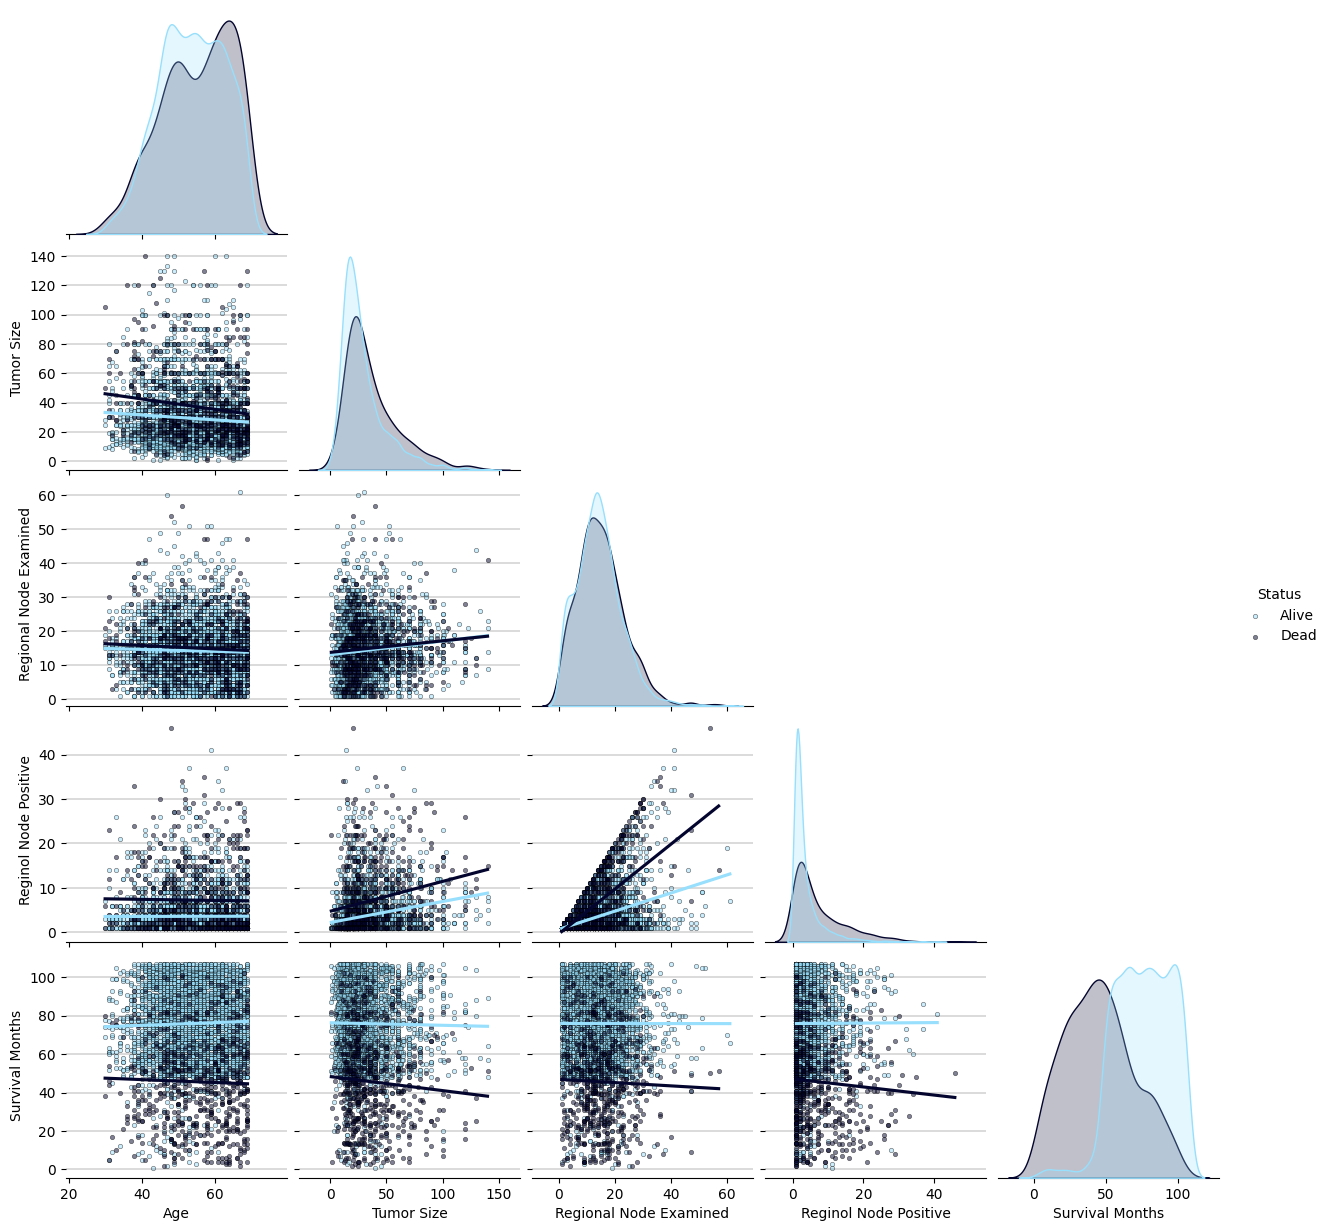

In [32]:
g = sns.pairplot(df, hue="Status", palette=[colors[2], colors[1]], corner=True,
            kind="reg", 
            plot_kws={
                "ci":None,
                "scatter_kws": {
                    "alpha":0.5, "s":10, "linewidth":0.5, "edgecolor":"black"
                }},
            diag_kws={
                "common_norm":False
            })

for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)

plt.show()
